In [37]:
#5단원
import pandas as pd
wine = pd.read_csv('https://gitlab.ngrid.kr/root/class_deep/-/raw/main/wine_csv_data') #pd.read_csv 중 .의 의미는 판다스안에 read_csv라는 함수가 있다는 얘기
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [38]:
#와인의 정보(알콜 도수, 당도, 산성, 구분(레드와인/화이트와인))
#데이터 프레임(DataFrame)은 데이터의 대한 기본 정보를 표시
#데이터 타입은 전부 실수
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [39]:
#데이터의 기초통계량 *std = 표준편차
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [40]:
#데이터 준비하기
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [41]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.3, random_state=42)

print(train_input.shape, test_input.shape)

(4547, 3) (1950, 3)


In [42]:
#
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [43]:
#이진분류 용이함을 위한 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(train_scaled, train_target))
print(lr.coef_, lr.intercept_) #r계수와 절편 y=ax+b 답: 0.53657472 + 1.67751443 + (-0.70318861) + 1.82826977

0.7842533538596878
0.7842533538596878
[[ 0.53657472  1.67751443 -0.70318861]] [1.82826977]


0.9971409720694964
0.8594871794871795


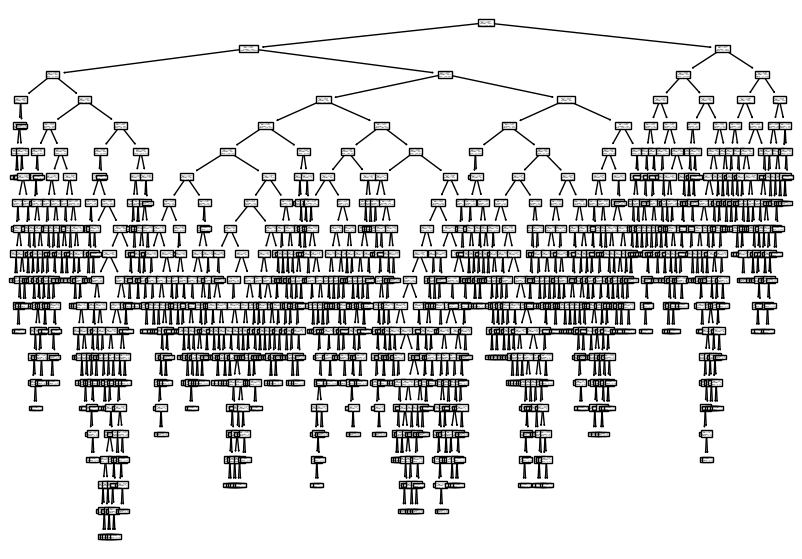

In [54]:
#결정 나무
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

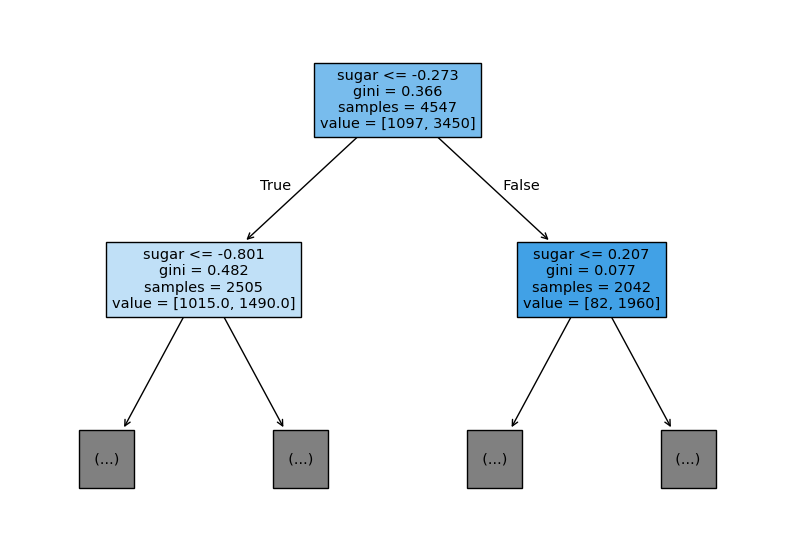

In [66]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alchol', 'sugar', 'pH'])
plt.show()

0.8493512205850011
0.84


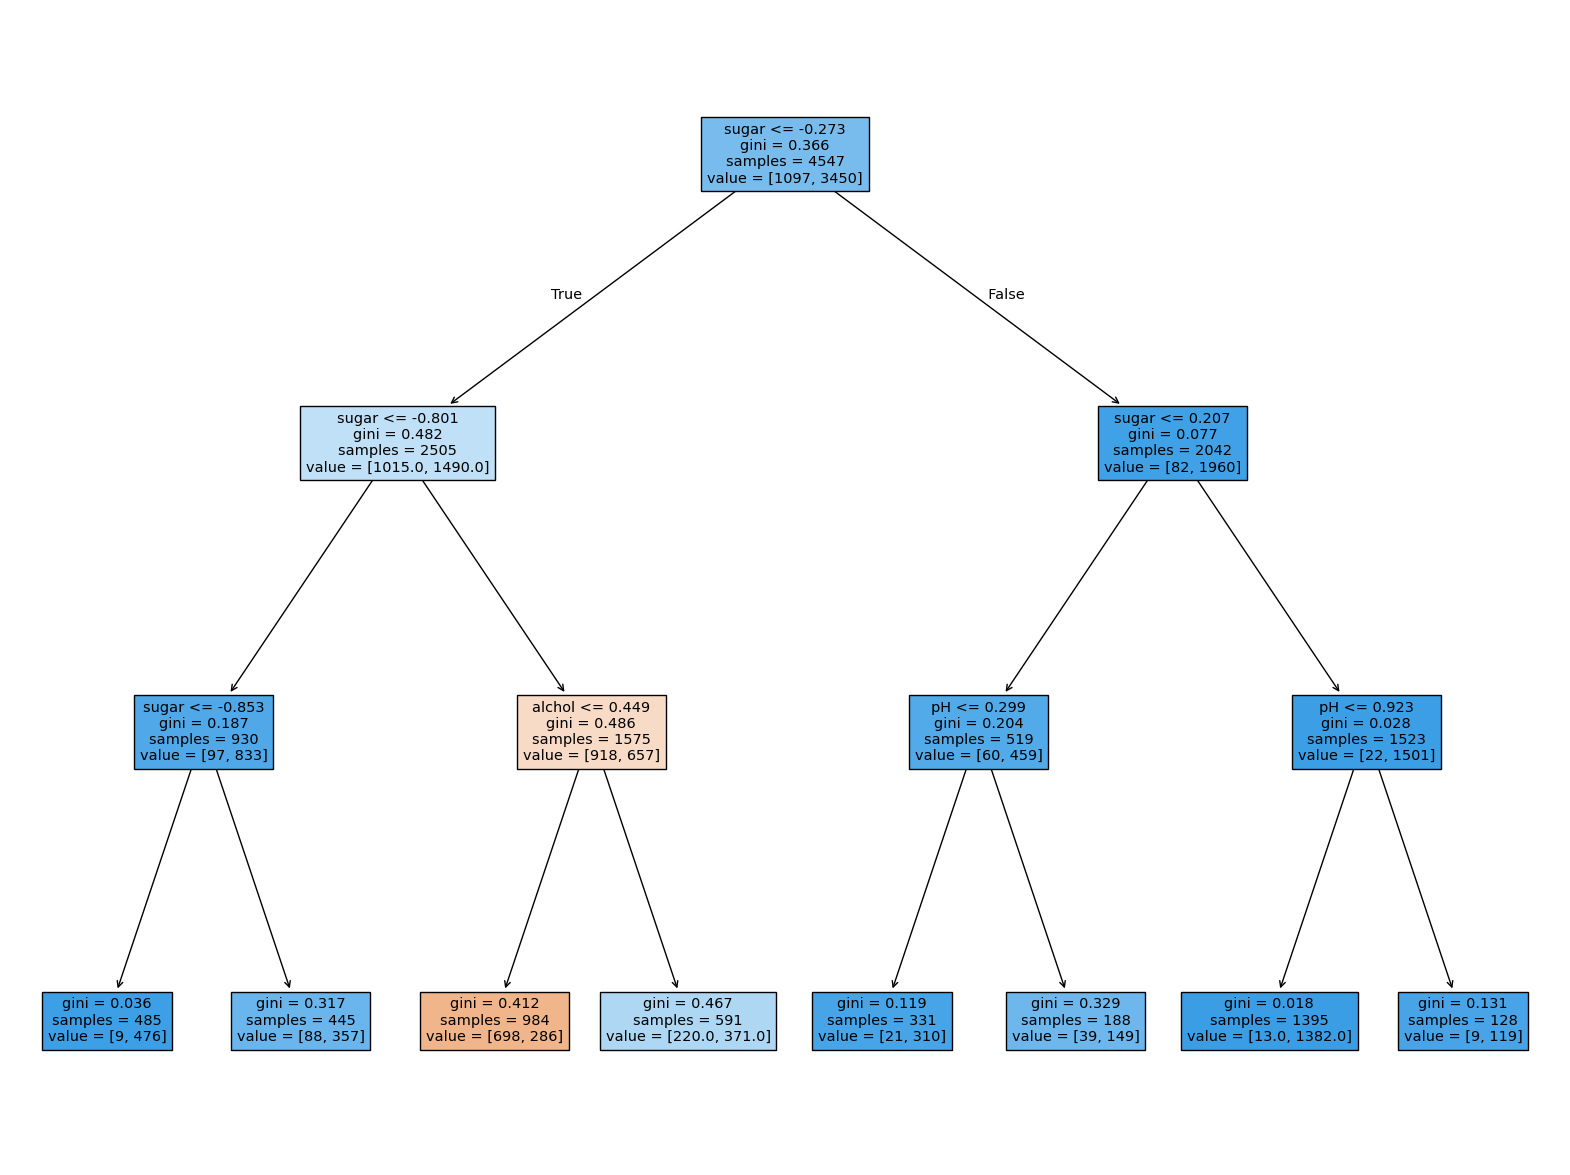

In [65]:
#가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alchol', 'sugar', 'pH'])
plt.show()


0.8493512205850011
0.84


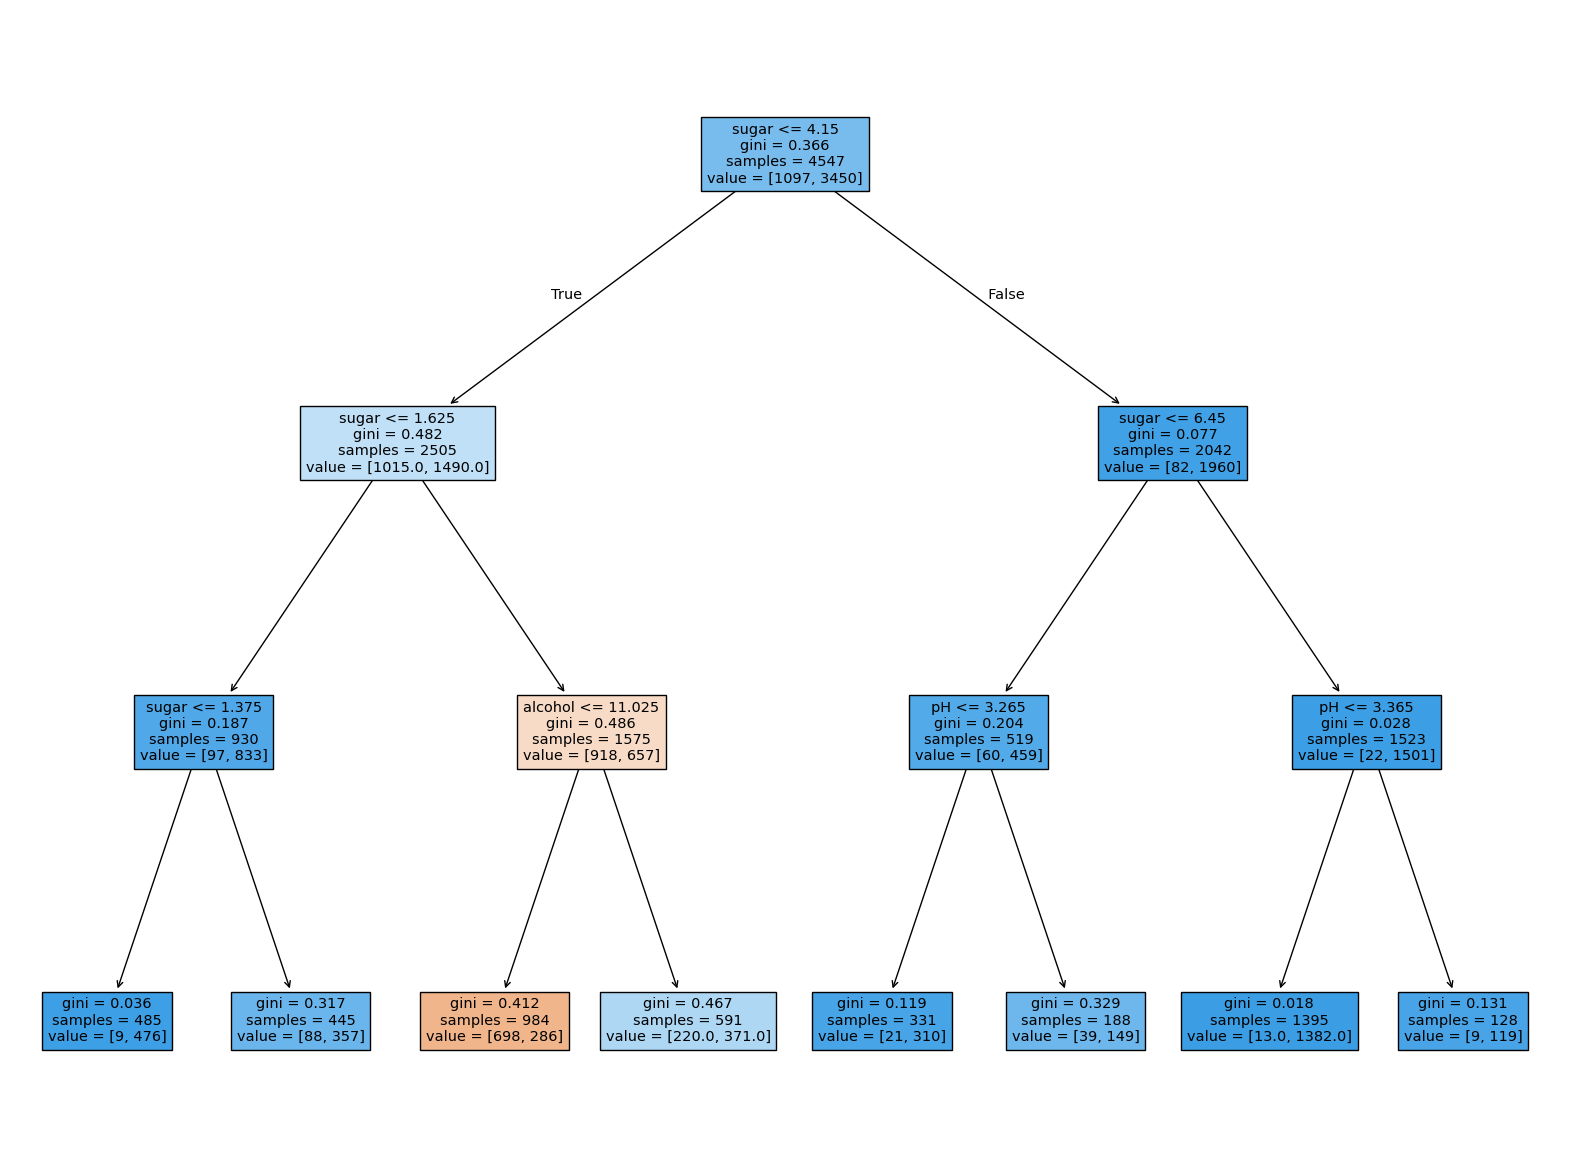

[0.12336777 0.86803934 0.00859289]


In [62]:
#스케일 조정하지 않은 특성 사용하기

dt = DecisionTreeClassifier(max_depth= 3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

print(dt.feature_importances_)
